In [1]:
import numpy as np
import pandas as pd

# 시각적으로 결측치 데이터 위치를 확인.
import missingno as mg
import matplotlib.pyplot as plt

In [2]:
# 사용할 데이터 만들기.
data =  {'eng':[10,30,50,70],
         'kor':[20,40,60,80],
         'math':[90,50,20,70]}
df = pd.DataFrame(data, index = ['a','b','c','d'])
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


#### 추가, 수정

- 열 수정

In [3]:
# 해당 컬럼이 있으면 수정.
df['eng'] = [1, 2, 3, 4]
df

,eng,kor,math
a,1,20,90
b,2,40,50
c,3,60,20
d,4,80,70


- 열 추가

In [4]:
# 해당 컬럼이 없으면 추가.
df['jap'] = df['kor'] + df['eng']
df

,eng,kor,math,jap
a,1,20,90,21
b,2,40,50,42
c,3,60,20,63
d,4,80,70,84


- 행 수정

In [5]:
# 해당 행이 있으면 수정.
# loc을 이용해서 가능.
df.loc['a'] = [10, 20, 30, 40] 
df

,eng,kor,math,jap
a,10,20,30,40
b,2,40,50,42
c,3,60,20,63
d,4,80,70,84


- 행 추가

In [6]:
# 헤당 행이 없으면 추가.
# loc을 이용해서 가능.
df.loc['d'] = [1, 2, 3, 4] 
df

,eng,kor,math,jap
a,10,20,30,40
b,2,40,50,42
c,3,60,20,63
d,1,2,3,4


#### 삭제

- 열 삭제

In [7]:
# columns 설정을 통해 지정한 열을 지울수 있음.
df.drop(columns=['eng','math'])

,kor,jap
a,20,40
b,40,42
c,60,63
d,2,4


- 행 삭제

In [8]:
# index 설정을 통해 지정한 행을 지울수 있음.
df.drop(index=['a','c'])

,eng,kor,math,jap
b,2,40,50,42
d,1,2,3,4


#### 결측 데이터 처리(대표값, 삭제)
- 결측치 변환
    - np.nan
    
- 결측치 확인
    - df.isna().sum()
    - mg.matrix(df)
    
- 결측치 처리 방법
    - dropna() : 결측치 삭제.
        - sunset : 집합처럼 묶어 처리 가능.
    - fillna() : 경우에 따라서 결측지를 평균, 중앙값, 최빈값 등으로 채움.
        - axis = 0 : 행 기준.
        - axis = 1 : 열 기준.

In [9]:
# 결측값 변환.
df.loc['b':'c', 'kor'] = np.nan
df.loc['c':'d', 'math']= np.nan
df

,eng,kor,math,jap
a,10,20.0,30.0,40
b,2,NaN,50.0,42
c,3,NaN,NaN,63
d,1,2.0,NaN,4


In [10]:
# 결측치가 어떤 컬럼에 얼마나 존재하는지를 보여줌.
df.isna().sum()      

eng     0
kor     2
math    2
jap     0
dtype: int64

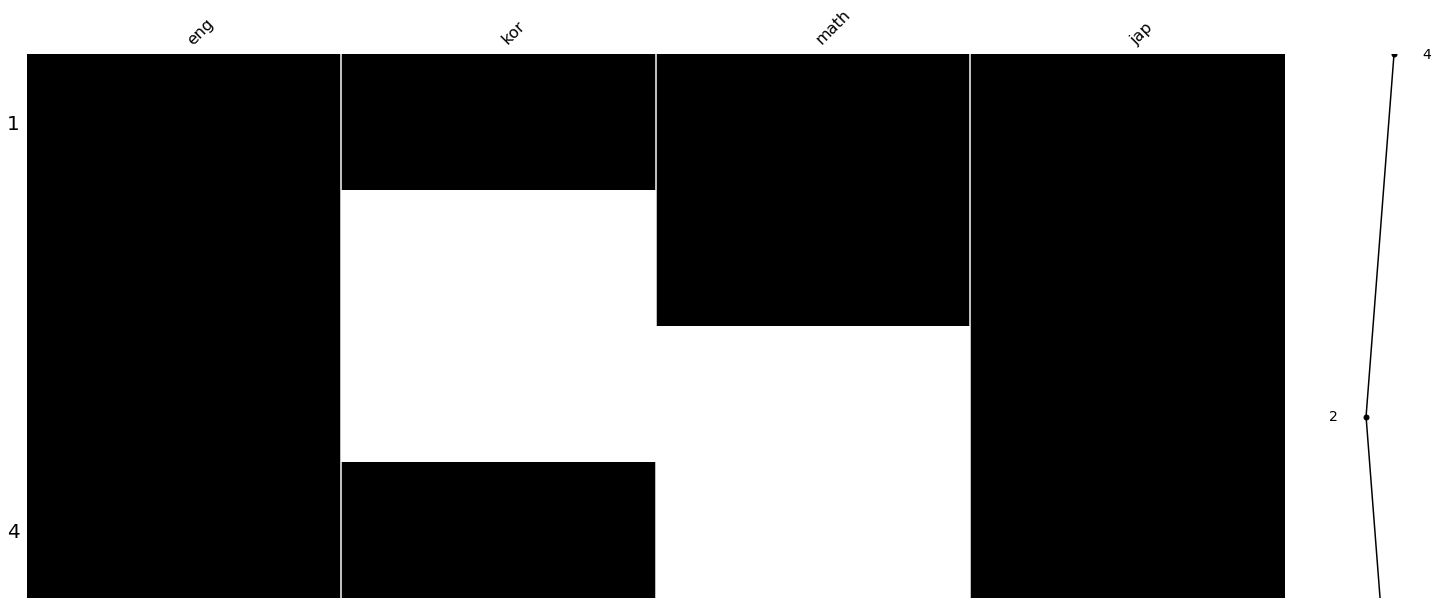

In [11]:
# 결측치 부분을 시각적으로 표현.
mg.matrix(df, color=(0,0,0))
plt.show()

In [12]:
# 결측치를 채워줌.
# fillna(x) : 지정한 x값으로 결측치를 채워줌.
df['kor'].fillna(1)   

a    20.0
b     1.0
c     1.0
d     2.0
Name: kor, dtype: float64

In [13]:
# 결측치 행을 삭제.
df.dropna()

# 결측치 열을 삭제.
df.dropna(axis=1)

,eng,jap
a,10,40
b,2,42
c,3,63
d,1,4


In [14]:
# subset을 통해 여러 컬럼에 존재하는 결측치를 지울수 있음.
df.dropna( subset=['kor', 'math'] )

,eng,kor,math,jap
a,10,20.0,30.0,40


#### 정렬

In [15]:
# by에 특정 컬럼명을 지정하면 그에 맞게 행기준으로 정렬.
# ascending=False : 내림차순.
# ascending=True : 오름차순.
df.sort_values(by='math', ascending=False)

,eng,kor,math,jap
b,2,NaN,50.0,42
a,10,20.0,30.0,40
c,3,NaN,NaN,63
d,1,2.0,NaN,4


In [16]:
df.sort_values(by=['jap', 'eng'], ascending=False)

,eng,kor,math,jap
c,3,NaN,NaN,63
b,2,NaN,50.0,42
a,10,20.0,30.0,40
d,1,2.0,NaN,4


In [17]:
# 열기준으로 정렬.
df.sort_index()

,eng,kor,math,jap
a,10,20.0,30.0,40
b,2,NaN,50.0,42
c,3,NaN,NaN,63
d,1,2.0,NaN,4
